In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy
from kneed import KneeLocator

In [138]:
df = pd.read_csv('internetSpeed_Indonesia - 2020.csv')
df = df.dropna()
df.head(10)

,Year,Location,Download,Upload,UMR,persentase pengguna internet,Jumlah penduduk
0,2020,Aceh,10.2,4.8,"2 916 810,00",71.97,5.388.100
1,2020,Bali,11.6,6.9,"2 297 969,00",85.67,4.414.400
2,2020,Bangka Belitung,10.6,4.5,"2 976 706,00",78.35,1.469.800
3,2020,Banten,10.4,4.9,"2 267 990,00",84.07,12.895.300
4,2020,Bengkulu,9.5,4.4,"2 040 407,00",71.69,1.994.300
5,2020,Jawa Tengah,9.6,5.1,"1 605 396,00",79.66,34.738.200
6,2020,Kalimantan Tengah,11.0,7.1,"2 663 435,00",76.57,2.686.300
7,2020,Sulawesi Tengah,13.6,4.8,"2 123 040,00",68.70,3.081.700
8,2020,Jawa Timur,11.3,5.5,"1 630 059,00",77.21,39.955.900
9,2020,Kalimantan Timur,13.2,7.0,"2 747 561,00",86.87,3.664.700


In [139]:
df2 = pd.read_csv('internetSpeed_Indonesia - 2021.csv')
df2 = df2.dropna()
df2.head(10)

,Year,Location,Download,Upload,UMR,persentase pengguna internet,Jumlah penduduk
0,2021,Aceh,20.59,5.31,"3.160.000,00",75.54,5.334.000
1,2021,Bali,24.71,16.98,"2.494.000,00",87.80,4.363.000
2,2021,Bangka Belitung,19.17,7.02,"3.230.023,00",82.89,1.473.000
3,2021,Banten,21.30,8.08,"4.230.792,65",87.45,12.061.000
4,2021,Bengkulu,17.74,4.77,"2.215.000,00",78.03,2.033.000
5,2021,Jawa Tengah,17.55,6.45,"1.813.011,00",82.88,36.743.000
6,2021,Kalimantan Tengah,20.31,6.64,2.903.144.00,80.27,2.702.000
7,2021,Sulawesi Tengah,16.76,4.64,"2.303.711,00",76.51,3.022.000
8,2021,Jawa Timur,17.05,6.53,"4.300.479,00",79.66,40.879.000
9,2021,Kalimantan Timur,20.14,6.43,"2.981.378,00",89.67,3.808.000


In [140]:
df3 = pd.read_csv('internetSpeed_Indonesia - 2022.csv')
df3 = df3.dropna()
df3.head(10)

,Year,Location,Download,Upload,UMR,persentase pengguna internet,Jumlah penduduk,Unnamed: 7
0,2022,Aceh,22.56,9.42,"3.116.460,00",80.83,5.380.000,75.54
1,2022,Bali,29.46,24.54,"2.516.971,00",93.95,4.290.000,87.80
2,2022,Bangka Belitung,21.76,13.58,"3.264.884,00",88.69,1.470.000,82.89
3,2022,Banten,26.34,11.65,"2.501.203,11",93.57,12.150.000,87.45
4,2022,Bengkulu,19.25,9.08,"2.238.094,31",83.49,2.050.000,78.03
5,2022,Jawa Tengah,17.98,9.50,"1.812.935,00",88.68,37.490.000,82.88
6,2022,Kalimantan Tengah,22.64,10.15,"2.922.516,09",85.89,2.670.000,80.27
7,2022,Sulawesi Tengah,19.32,9.58,"2.390.739,00",81.87,3.070.000,76.51
8,2022,Jawa Timur,18.83,8.77,"1.891.567,12",85.24,41.140.000,79.66
9,2022,Kalimantan Timur,22.18,10.23,"3.014.497,22",95.95,3.890.000,89.67


In [141]:
x = df.iloc[:,[3,4]]
x = x.values.tolist()
x = numpy.array(x)
print(x[0])

['4.8' '2 916 810,00']


In [142]:
x2 = df2.iloc[:,[3,4]]
x2 = x2.values.tolist()
x2 = numpy.array(x2)
print(x2[0])

['5.31' '3.160.000,00']


In [143]:
x3 = df3.iloc[:,[3,4]]
x3 = x3.values.tolist()
x3 = numpy.array(x3)
print(x3[0])

['9.42' '3.116.460,00']


In [144]:
dfc = df.iloc[:,[2,3,4]]
dfc = dfc.values.tolist()

dfc2 = df2.iloc[:,[2,3,4]]
dfc2 = dfc2.values.tolist()

dfc3 = df3.iloc[:,[2,3,4]]
dfc3 = dfc3.values.tolist()

x = x.tolist()
x2 = x2.tolist()
x3 = x3.tolist()

# print(float(dfc[0][1]) + float(dfc[0][0]))
for i in range (34):
    x[i][0] = round(((float(dfc[i][1]) + float(dfc[i][0])))/2,2)
    x2[i][0] = round(((float(dfc2[i][1]) + float(dfc2[i][0])))/2,2)
    x3[i][0] = round(((float(dfc3[i][1]) + float(dfc3[i][0])))/2,2)

    
    x[i][1] = dfc[i][2][:-3].replace(" ", "")
    x2[i][1] = dfc2[i][2][:-3].replace(" ", "")
    x3[i][1] = dfc3[i][2][:-3].replace(" ", "")

    x[i][1] = x[i][1].replace(".", "")
    x2[i][1] = x2[i][1].replace(".", "")
    x3[i][1] = x3[i][1].replace(".", "")

    x[32][1] = 2860382

    x[i][1] = int(x[i][1])
    x2[i][1] = int(x2[i][1])
    x3[i][1] = int(x3[i][1])
    
    # x[i][1] = x[i][1].astype(numpy.float)
    # x2[i][1] = int(dfc2[i][2])
    # x3[i][1] = int(dfc3[i][2])

# x = x.tolist()
# x2 = x2.tolist()
# x3 = x3.tolist()

x = numpy.array(x)
x2 = numpy.array(x2)
x3 = numpy.array(x3)

# x[32][1] = 2860382
# print(x)
print(type(x[32][0]))

<class 'numpy.float64'>


In [145]:
print(x2)

[[1.295000e+01 3.160000e+06]
 [2.084000e+01 2.494000e+06]
 [1.310000e+01 3.230023e+06]
 [1.469000e+01 4.230792e+06]
 [1.125000e+01 2.215000e+06]
 [1.200000e+01 1.813011e+06]
 [1.347000e+01 2.903144e+06]
 [1.070000e+01 2.303711e+06]
 [1.179000e+01 4.300479e+06]
 [1.329000e+01 2.981378e+06]
 [1.262000e+01 1.950000e+06]
 [1.154000e+01 2.586900e+06]
 [1.875000e+01 4.416186e+06]
 [1.223000e+01 2.630162e+06]
 [1.152000e+01 2.400000e+06]
 [1.154000e+01 2.604961e+06]
 [1.308000e+01 3.000803e+06]
 [1.234000e+01 2.721530e+06]
 [1.251000e+01 3.310721e+06]
 [1.288000e+01 3.516700e+06]
 [1.181000e+01 2.888563e+06]
 [1.379000e+01 3.005383e+06]
 [1.177000e+01 2.552014e+06]
 [1.363000e+01 2.903144e+06]
 [1.396000e+01 3.043111e+06]
 [1.270000e+01 1.765608e+06]
 [1.430000e+01 1.810351e+06]
 [1.304000e+01 2.399698e+06]
 [1.198000e+01 2.183883e+06]
 [1.198000e+01 3.134600e+06]
 [1.156000e+01 2.571328e+06]
 [1.354000e+01 2.484041e+06]
 [1.294000e+01 3.165876e+06]
 [1.389000e+01 2.499422e+06]]


In [146]:
print(x3)

[[1.599000e+01 3.116460e+06]
 [2.700000e+01 2.516971e+06]
 [1.767000e+01 3.264884e+06]
 [1.900000e+01 2.501203e+06]
 [1.416000e+01 2.238094e+06]
 [1.374000e+01 1.812935e+06]
 [1.639000e+01 2.922516e+06]
 [1.445000e+01 2.390739e+06]
 [1.380000e+01 1.891567e+06]
 [1.620000e+01 3.014497e+06]
 [1.604000e+01 1.975000e+06]
 [1.405000e+01 2.800580e+06]
 [2.320000e+01 4.641854e+06]
 [1.479000e+01 2.698940e+06]
 [1.355000e+01 2.440486e+06]
 [1.478000e+01 2.619312e+06]
 [1.561000e+01 3.016738e+06]
 [1.804000e+01 2.862231e+06]
 [1.234000e+01 3.310723e+06]
 [1.598000e+01 3.561932e+06]
 [1.477000e+01 2.938564e+06]
 [1.516000e+01 3.050172e+06]
 [1.380000e+01 2.576016e+06]
 [1.706000e+01 2.906473e+06]
 [1.748000e+01 3.144446e+06]
 [1.463000e+01 1.840915e+06]
 [1.823000e+01 1.841487e+06]
 [1.646000e+01 2.434328e+06]
 [1.358000e+01 2.207212e+06]
 [1.491000e+01 3.200000e+06]
 [1.326000e+01 2.678863e+06]
 [1.536000e+01 2.512539e+06]
 [1.589000e+01 3.165876e+06]
 [1.286000e+01 2.522609e+06]]


In [147]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x) 
    distortions.append(km.inertia_)

kl = KneeLocator(range(1, 11), distortions, curve="convex", direction="decreasing")
kl.elbow

4

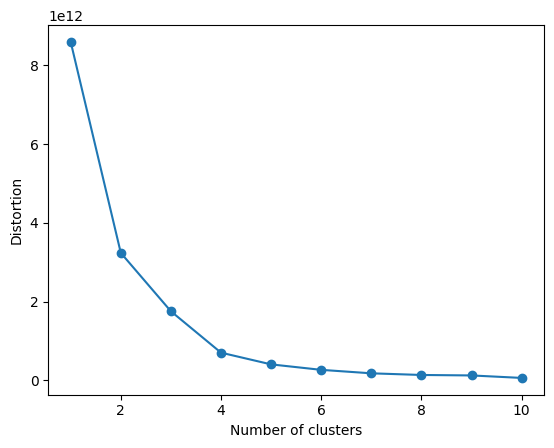

In [152]:
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [148]:
km = KMeans (n_clusters= kl.elbow,
init = 'random', n_init= 10, 
max_iter= 300, tol= 0.01, random_state=0 
)

In [149]:
y_km = km.fit_predict(x)
print(y_km)

[3 0 3 0 1 1 3 0 1 3 1 0 2 0 0 0 3 0 3 3 3 3 0 3 3 1 1 0 1 3 0 0 3 0]


In [150]:
y_km2 = km.fit_predict(x2)
print(y_km2)

[3 0 3 1 0 2 3 0 1 3 2 0 1 0 0 0 3 0 3 3 3 3 0 3 3 2 2 0 0 3 0 0 3 0]


In [151]:
y_km3 = km.fit_predict(x3)
print(y_km3)

[3 0 3 0 2 2 3 0 2 3 2 0 1 0 0 0 3 3 3 3 3 3 0 3 3 2 2 0 2 3 0 0 3 0]


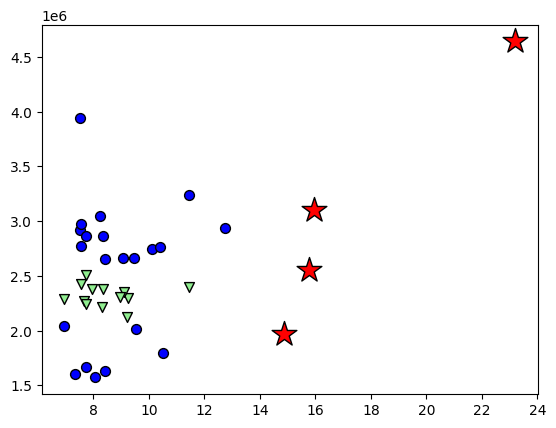

In [153]:
plt.scatter(
    x[y_km == 0, 0], x[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='v', edgecolor='black',
    label='c1'
)

plt.scatter(
    x[y_km == 1, 0], x[y_km == 1, 1],
    s=50, c='blue',
    marker='o', edgecolor='black',
    label='c2'
)

plt.scatter(
    x[y_km == 2, 0], x[y_km == 2, 1],
    s=50, c='blue',
    marker='o', edgecolor='black',
    label='c2'
)

plt.scatter(
    x[y_km == 3, 0], x[y_km == 3, 1],
    s=50, c='blue',
    marker='o', edgecolor='black',
    label='c2'
)

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=350, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)